### Predicting test scores based on hours of sleep and how many hours you study the night before

In [5]:
%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [12]:
# hours of sleep and hours of study 
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
# test scores
y = np.array(([75], [82], [93]), dtype=float)
print(y)

[[ 75.]
 [ 82.]
 [ 93.]]


In [13]:
# since our data is in hours and test scores is in numbers we will divide everything so it comes in range of 0-1

X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100
print(y)

[[ 0.75]
 [ 0.82]
 [ 0.93]]


###### A simple neural network which takes 2 inputs , has 3 hidden layers and as 1 output

In [14]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(self.inputLayerSize, self.hiddenLayerSize))
        self.weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(self.hiddenLayerSize, self.outputLayerSize))
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.weights_input_to_hidden)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.weights_hidden_to_output)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

In [15]:
# Now we call the previous neural network and pass our hours through and see what is the result of yHat ( the output result)
NN = Neural_Network()
yHat = NN.forward(X) # You can pass in anything you want in X but I am using the same array
print(yHat)

[[ 0.49487797]
 [ 0.4951042 ]
 [ 0.49546701]]


In [6]:
# printing our original Y
print(y)

[[ 0.75]
 [ 0.82]
 [ 0.93]]


So looks like the predictions are very wrong after passing it through the neural network.

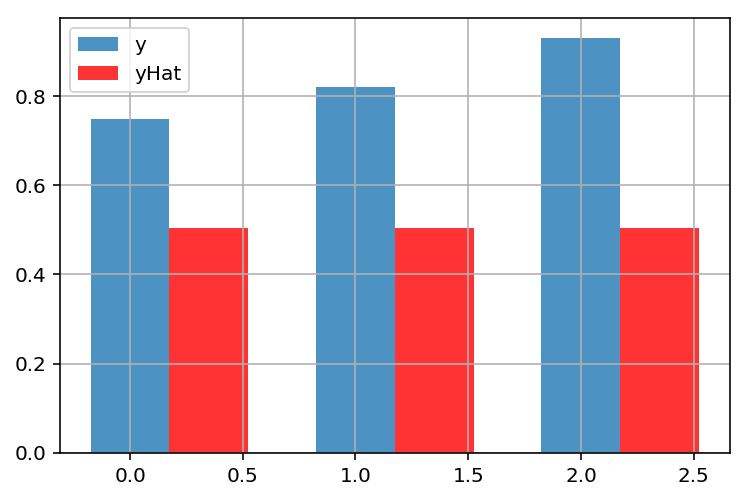

In [7]:
#Compare estimate, yHat, to actually score y
bar([0,1,2], y, width = 0.35, alpha=0.8)
bar([0.35,1.35,2.35],yHat, width = 0.35, color='r', alpha=0.8)
grid(1)
legend(['y', 'yHat'])

Lets now train the network - Getting started with Backpropagation

In [77]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(self.inputLayerSize, self.hiddenLayerSize))
        self.weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(self.hiddenLayerSize, self.outputLayerSize))
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.weights_input_to_hidden) # hidden input
        self.a2 = self.sigmoid(self.z2) # activation function
        self.z3 = np.dot(self.a2, self.weights_hidden_to_output) # final input
        yHat = self.sigmoid(self.z3) # final output
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

In [78]:
NN = Neural_Network()
j = NN.costFunction(X,y)
print(j)

0.186548402162
